### Predict house price of in the real estate data

#### import necessary modules and read the input file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
real_estate_data = pd.read_csv("Real estate_polynomial_regression.csv")

In [3]:
real_estate_data.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   No                                   414 non-null    int64  
 1   transaction date                     414 non-null    float64
 2   house age                            414 non-null    float64
 3   distance to the nearest MRT station  414 non-null    float64
 4   number of convenience stores         414 non-null    int64  
 5   latitude                             414 non-null    float64
 6   longitude                            414 non-null    float64
 7   house price of unit area             414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
real_estate_data.columns

Index(['No', 'transaction date', 'house age',
       'distance to the nearest MRT station', 'number of convenience stores',
       'latitude', 'longitude', 'house price of unit area'],
      dtype='object')

#### Drop columns which are not required, check for null values and treat them if required

In [6]:
real_estate_data.drop(columns={'No','transaction date'}, inplace=True)

In [7]:
real_estate_data.isnull().sum()

house age                              0
distance to the nearest MRT station    0
number of convenience stores           0
latitude                               0
longitude                              0
house price of unit area               0
dtype: int64

In [8]:
real_estate_data.describe()

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   house age                            414 non-null    float64
 1   distance to the nearest MRT station  414 non-null    float64
 2   number of convenience stores         414 non-null    int64  
 3   latitude                             414 non-null    float64
 4   longitude                            414 non-null    float64
 5   house price of unit area             414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


<AxesSubplot:>

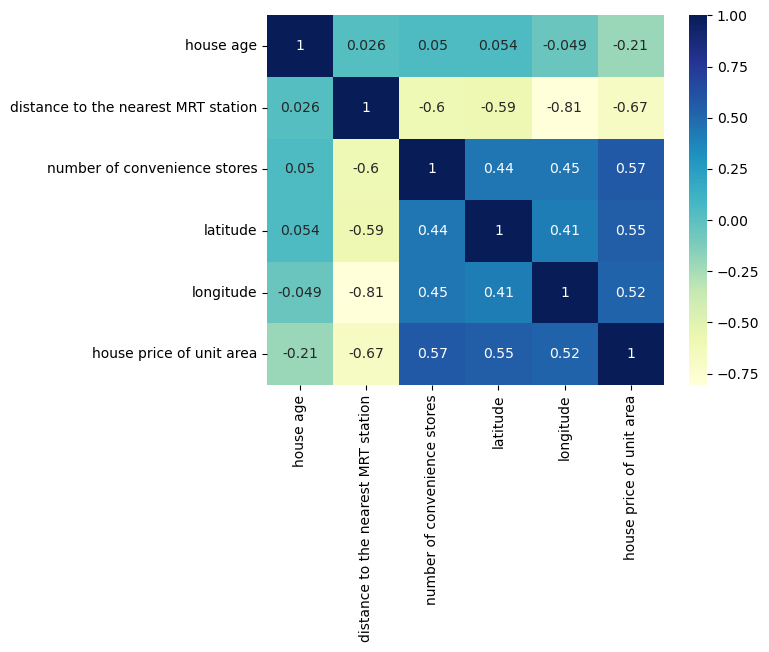

In [10]:
sns.heatmap(real_estate_data.corr(), annot=True,cmap="YlGnBu")

#### The heatmap of correlation chart shows high negative correlation between house price and distance to the nearest MRT station, which is as expected. It also show strong correlation with number of convenience stores.

#### Linear regression can't be applied on dataset with multicolinearity between independent variables. We can demonstrate the same by first applying linear regression on the data

In [11]:
# Splitting variables

X=real_estate_data.drop('house price of unit area', axis=1) # independent
y=real_estate_data['number of convenience stores'] # dependent

In [12]:
X.shape

(414, 5)

In [13]:
y.shape

(414,)

#### Linear Regression

In [14]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     number of convenience stores   R-squared:                       1.000
Model:                                      OLS   Adj. R-squared:                  1.000
Method:                           Least Squares   F-statistic:                 7.711e+27
Date:                          Fri, 04 Oct 2024   Prob (F-statistic):               0.00
Time:                                  00:27:28   Log-Likelihood:                 11347.
No. Observations:                           414   AIC:                        -2.268e+04
Df Residuals:                               408   BIC:                        -2.266e+04
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
------

In [15]:
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
model = LinearRegression()
model.fit(X_linear_train, y_linear_train)

LinearRegression()

In [17]:
pd.DataFrame(model.coef_, X.columns, columns=['Coedicients'])

,Coedicients
house age,-1.310343e-19
distance to the nearest MRT station,5.148628e-19
number of convenience stores,1.000000e+00
latitude,6.596508e-16
longitude,3.229477e-16


In [18]:
y_linear_pred = model.predict(X_linear_test)

In [19]:
MAE_linear= metrics.mean_absolute_error(y_linear_test, y_linear_pred)
MSE_linear=metrics.mean_squared_error(y_linear_test, y_linear_pred)
RMSE_linear= np.sqrt(MSE_linear)

pd.DataFrame([MAE_linear, MSE_linear, RMSE_linear],
             index=['MAE_linear', 'MSE_linear', 'RMSE_linear'], columns=['metrics'])

,metrics
MAE_linear,1.275417e-15
MSE_linear,2.727610e-30
RMSE_linear,1.651548e-15


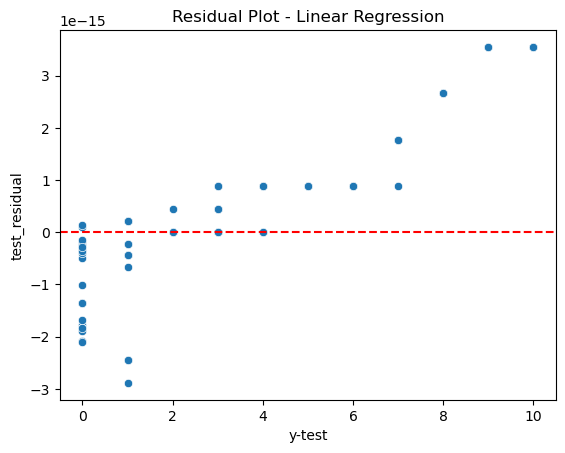

In [20]:
test_residual= y_linear_test - y_linear_pred

sns.scatterplot(x=y_linear_test, y=test_residual)
plt.title('Residual Plot - Linear Regression')
plt.xlabel('y-test')
plt.ylabel('test_residual')
plt.axhline(y=0, color='r', ls='--')

#### The residual plot is not normally distributed due to strong multicolinearity as seen above. Hence, linear regression can't be applied.

#### Polynomial Regression

In [21]:
print('X=',X.shape, 'Y=', y.shape)

X= (414, 5) Y= (414,)


In [22]:
polynomial_regresion = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_regresion.fit_transform(X)

In [23]:
X

,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381
410,5.6,90.45606,9,24.97433,121.54310
411,18.8,390.96960,7,24.97923,121.53986
412,8.1,104.81010,5,24.96674,121.54067


In [24]:
X_poly.shape

(414, 20)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

In [26]:
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,0,-8.361525e-11,8.361525e-11
347,1,1.000000e+00,1.793397e-10
307,0,-3.220828e-11,3.220828e-11
299,10,1.000000e+01,-1.683986e-11
391,1,1.000000e+00,7.029155e-12


In [28]:
polymodel.coef_

array([ 3.25649262e-11,  4.78810981e-15,  1.00000000e+00, -5.44396711e-11,
       -3.81106162e-10, -6.74878279e-16, -4.19988043e-18, -7.00491829e-16,
        1.07667590e-12, -4.87811514e-13, -4.69045788e-18, -2.63094247e-17,
       -7.08426753e-17, -1.29363408e-17,  1.32690134e-16, -2.50345864e-15,
       -8.58432910e-16,  1.16002355e-12, -1.00531716e-14,  1.60410561e-12])

In [29]:
polymodel.intercept_

2.3296917284199026e-08

In [30]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,1.752584e-11
MSE,9.330755e-22
RMSE,3.054629e-11


In [31]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):
    
    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    
    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    
    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    
    #Evaluating the Model
    
    #RMSE of Train set
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    
    #RMSE of Test Set
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    
    #Append the RMSE to the Train and Test List
    
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

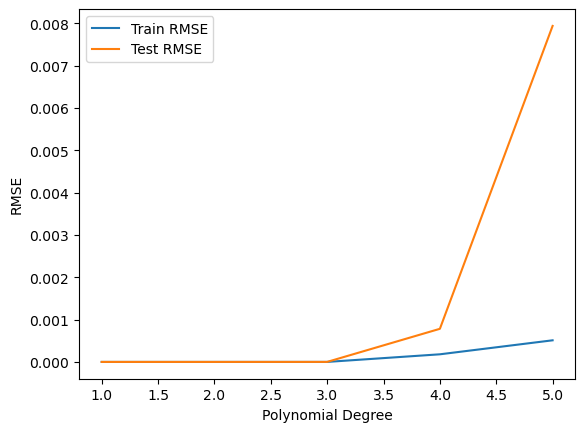

In [32]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()

#### After 3 degree of polynomial, the model could be overfitting

In [33]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,1.752584e-11
MSE,9.330755e-22
RMSE,3.054629e-11


#### The RMSE of polynomial with 2 degrees is 3.054629e-11, which could be considered a good model